In [1]:
import matplotlib.pyplot as plt
from itertools import *
import numpy as np

In [2]:
################ Dictionary Management ################

# sorting dicts

def sort_dict(d, k):
    return dict(sorted(d.items(), key=k))

def sort_hl(d):
    return sort_dict(d, lambda item: (-item[1], item[0]))
    
def sort_lh(d):
    return sort_dict(d, lambda item: (item[1], item[0]))

def sort_abs_hl(d):
    return sort_dict(d, lambda item: (-abs(item[1]), item[0]))

def sort_abs_lh(d):
    return sort_dict(d, lambda item: (abs(item[1]), item[0]))

def sort_len_hl(d):
    return sort_dict(d, lambda item: (-len(item[1]), item[0]))
    
def sort_len_lh(d):
    return sort_dict(d, lambda item: (len(item[1]), item[0]))

# cleaning dicts

def round_dict(dictionary, digits = 2):
    return {item[0] : round(item[1], digits) for item in dictionary.items() }

def clip_dict(dictionary, length = 20):
    return {item[0] : item[1] for item in list(dictionary.items())[:length]}
    
def clean_dict(dictionary, length = 50, digits = 2):
    return round_dict(dict(islice(dictionary.items(), length)), digits)

In [3]:
# a handy decorator, lets a function accept an item, many items, or a list of items, and returns it in the same format
def argmap(func, class_method = True):
  
    if class_method:


        def wrapper(self, *args, **kwargs):
            # get arglist
            if len(args) == 1:
                if type(args[0]) not in (tuple, list):
                    return func(self, args[0], **kwargs)
                else:
                    arglist = args[0]
            else:
                arglist = args

            return [func(self, arg, **kwargs) for arg in arglist]
        

    else:


        def wrapper(*args, **kwargs):
            # get arglist
            if len(args) == 1:
                if type(args[0]) not in (tuple, list):
                    return func(args[0], **kwargs)
                else:
                    arglist = args[0]
            else:
                arglist = args

            return [func(arg, **kwargs) for arg in arglist]
        

    return wrapper

In [4]:
################ Data visualization ################

# plots

def setup_plot(size = 1):
    plt.figure(figsize = (20 * size, 8 * size))

    
def plot_values(values):
    values = np.array(values)
    xlist  = np.arange(0, len(values))
    plt.plot(xlist, values)


def plot_dict(dictionary, start = 0, length = 20, mode = 'bar', add_mode = 'one_shot', title = ''):

    keys   = list(dictionary.keys())
    values = list(dictionary.values())
    
    if add_mode == 'one_shot':
        setup_plot()
        plt.title(title)
        
    if mode == 'bar':
        plt.bar(
            keys[start : start + length],
            values[start : start + length],
            color     = 'skyblue', 
            edgecolor = 'black')
        
    elif mode == 'scatter':
        plt.scatter(
            np.arange(min(length, len(dictionary))),
            values[start : start + length])
        
    elif mode == 'pie':
        plt.pie(values, labels = keys)
            
    else:
        plot_values(values[start : start + length])


# text

def to_255(val):
    return max(min(int(val * 255), 255), 0)
    
def text_col(r, g, b):
    return f"\033[48;2;{to_255(r)};{to_255(g)};{to_255(b)}m"

def print_scanned_text(scanned_text, normalize = True):
    # accepts a list of tuples of (word, value)
    # not a dict! dicts are only unique values,
    # a sentence'll have duplicates
    max_val = 1
    if normalize:
        max_val = max([item[1] for item in scanned_text])

    result = ''
    for value in scanned_text:
        result += text_col(value[1], value[1] / max_val, 0)
        result += value[0]
        result += ' \033[37m\033[0m'

    print(result)


In [5]:

_skip_chars   = ' '
_concat_chars = 'qwertyuiopasdfghjklzxcvbnm'
    
def split_sentence(
        sentence,
        mode         = 'word',
        skip_chars   = None,
        concat_chars = None,
        add_border_tokens = True):

    if mode == 'char':
        splitted_sentence = list(sentence)
        
    elif mode == 'word':

        skip_chars   = skip_chars   or _skip_chars
        concat_chars = concat_chars or _concat_chars

        splitted_sentence = []
        current_word      = ''

        # adding a whitespace to the end will make it add the current word at the end
        for char in sentence + " ":

            if char in concat_chars:
                current_word += char
                continue

            # the current word is not in concat_chars now
            
            # add the current word if it's not empty
            if current_word != '':
                splitted_sentence.append(current_word)
                current_word = ''

            # if this is not a skip char, append it as its own word
            if char not in skip_chars:
                splitted_sentence.append(char)

    if add_border_tokens:
        return ['<START>'] + splitted_sentence + ['<END>']
    else:
        return splitted_sentence

def concat_sentence(sentence, mode = 'word'):
    return ('' if mode == 'char' else ' ').join(sentence)

#hitting, '_?ing->_+ing'
def lemmatize(word, lemma_rule):
    #_?ing, _+ing
    in_word, product = lemma_rule.split('->')
    # ?ing
    suffix = in_word[1:]
    # hit
    clip_word = word[:-len(suffix)]
    #_+ing
    product = product[1:]
    if '+' in product:
        if product[0] != '+':
            new_suffix, product = product.split('+')
            clip_word += new_suffix
        else:
            product = product[1:]
        return clip_word, product
    else:
        return [clip_word + product]

High to Low:  {'b': 2, 'd': 1, 'e': 0, 'c': -1, 'a': -2}
Low To High:  {'a': -2, 'c': -1, 'e': 0, 'd': 1, 'b': 2}


Abs High to Low:  {'a': -2, 'b': 2, 'c': -1, 'd': 1, 'e': 0}
Abs Low To High:  {'e': 0, 'c': -1, 'd': 1, 'a': -2, 'b': 2}


Len High to Low:  {'5': 'humuhumunukunukuāpuaʻa', '4': 'albatross', '2': 'elephant', '3': 'hyena', '1': 'cat'}
Len Low To High:  {'1': 'cat', '3': 'hyena', '2': 'elephant', '4': 'albatross', '5': 'humuhumunukunukuāpuaʻa'}


My name is Bob 
 and this is a rating of position 
 of first letter in the alphabet 


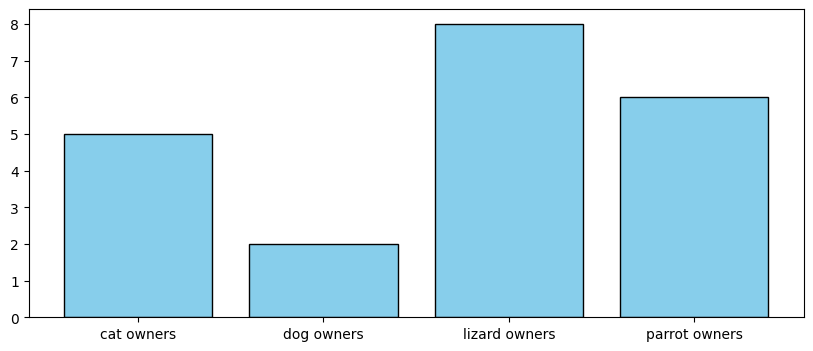

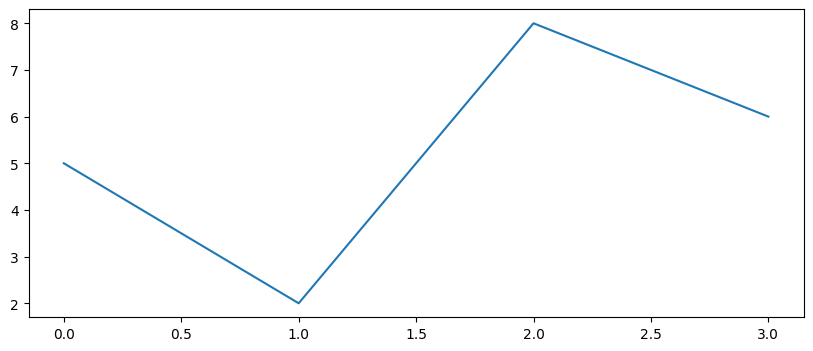

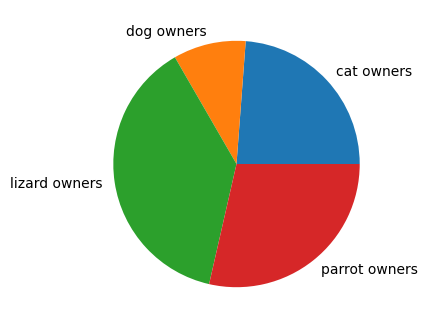

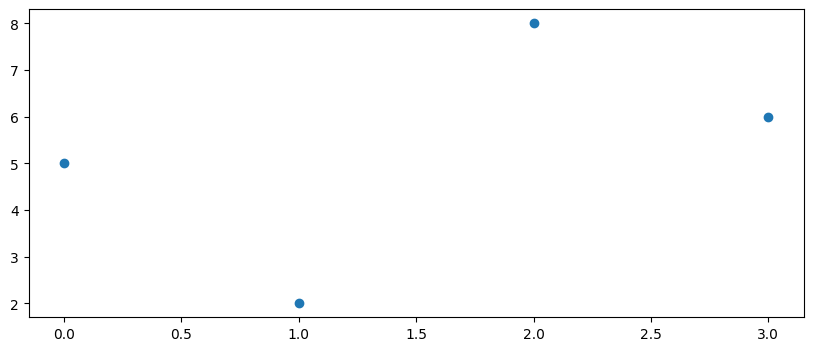

In [6]:

if __name__ == '__main__' and '__file__' not in globals():

    d = {'a': -2, 'b': 2, 'c': -1, 'd': 1, 'e': 0}

    print("High to Low: ", sort_hl(d))
    print("Low To High: ", sort_lh(d))

    print('\n')

    print("Abs High to Low: ", sort_abs_hl(d))
    print("Abs Low To High: ", sort_abs_lh(d))

    print('\n')

    d = {'1': 'cat', '2': 'elephant', '3': 'hyena', '4': 'albatross', '5': 'humuhumunukunukuāpuaʻa'}

    print("Len High to Low: ", sort_len_hl(d))
    print("Len Low To High: ", sort_len_lh(d))

    print('\n')

    text = [
        ('My', 13),
        ('name', 14),
        ('is', 9),
        ('Bob', 2),
        ('\n', 0),
        ('and', 1),
        ('this', 20),
        ('is', 9),
        ('a', 1),
        ('rating', 18),
        ('of', 15),
        ('position', 16),
        ('\n', 0),
        ('of', 15),
        ('first', 6),
        ('letter', 12),
        ('in', 9),
        ('the', 20),
        ('alphabet', 1),
    ]

    print_scanned_text(text)

    d = {'cat owners': 5, 'dog owners': 2, 'lizard owners': 8, 'parrot owners': 6}

    plot_size = .5

    setup_plot(plot_size)
    plot_dict(d, add_mode = 'additive')
    setup_plot(plot_size)
    plot_dict(d, mode = 'line', add_mode = 'additive')
    setup_plot(plot_size)
    plot_dict(d, mode = 'pie', add_mode = 'additive')
    setup_plot(plot_size)
    plot_dict(d, mode = 'scatter', add_mode = 'additive')